### Merge immune cells from CD45+ enriched and non-enriched samples

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import os
import sys
import warnings
import anndata
warnings.filterwarnings('ignore')


def MovePlots(plotpattern, subplotdir):
    os.system('mkdir -p '+str(sc.settings.figdir)+'/'+subplotdir)
    os.system('mv '+str(sc.settings.figdir)+'/*'+plotpattern+'** '+str(sc.settings.figdir)+'/'+subplotdir)


sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.figdir = './final-figures/merged/'
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80)  # low dpi (dots per inch) yields small inline figures

sys.executable

-----
anndata     0.7.5
scanpy      1.7.1
sinfo       0.3.1
-----
PIL                 8.1.0
anndata             0.7.5
backcall            0.2.0
cairo               1.20.0
cffi                1.14.5
constants           NA
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.1
decorator           4.4.2
get_version         2.1
google              NA
h5py                2.10.0
highs_wrapper       NA
igraph              0.8.3
ipykernel           5.5.0
ipython_genutils    0.2.0
jedi                0.18.0
joblib              1.0.1
kiwisolver          1.3.1
legacy_api_wrap     1.2
leidenalg           0.8.3
llvmlite            0.35.0
matplotlib          3.3.4
mpl_toolkits        NA
natsort             7.1.1
numba               0.52.0
numexpr             2.7.2
numpy               1.19.5
packaging           20.9
pandas              1.2.2
parso               0.8.1
pexpect             4.8.0
pickleshare         0.7.5
pkg_resources       NA
prompt_toolkit      3.0.16
psutil      

'/home/jovyan/my-conda-envs/scanpy_env/bin/python'

#### Load data

In [2]:
path_to_results = '/nfs/team292/vl6/immune_fetal_gonads/'

In [3]:
enriched = sc.read(path_to_results + 'immune_enriched_samples.h5ad')
enriched.obs['enrichment'] = 'enriched'
enriched

AnnData object with n_obs × n_vars = 16716 × 24625
    obs: 'batch', 'batch_collection', 'cryopreserved', 'individual', 'location', 'n_counts', 'n_genes', 'percent_mito', 'process', 'sample', 'sex', 'stage', 'study', 'PCW', 'sample_source', 'doublet_score', 'doublet_score_0.75', 'scrublet_score', 'scrublet_cluster_score', 'zscore', 'bh_pval', 'bonf_pval', 'is_doublet', 'leiden', 'enrichment'
    var: 'gene_ids-0', 'feature_types-0', 'n_cells-0', 'gene_ids-1', 'feature_types-1', 'n_cells-1', 'gene_ids-2', 'feature_types-2', 'n_cells-2', 'gene_ids-3', 'feature_types-3', 'n_cells-3', 'gene_ids-4', 'feature_types-4', 'n_cells-4', 'gene_ids-5', 'feature_types-5', 'n_cells-5', 'gene_ids-6', 'feature_types-6', 'n_cells-6', 'gene_ids-7', 'feature_types-7', 'n_cells-7', 'gene_ids-8', 'feature_types-8', 'n_cells-8', 'gene_ids-9', 'feature_types-9', 'n_cells-9', 'gene_ids-10', 'feature_types-10', 'n_cells-10', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'ccgs

In [4]:
non_enriched = sc.read(path_to_results + 'immune_non_enriched_samples.h5ad')
non_enriched.obs['enrichment'] = 'non-enriched'
non_enriched

AnnData object with n_obs × n_vars = 3177 × 19422
    obs: '5v1.1', 'TP', 'batch', 'batch_collection', 'cryopreserved', 'individual', 'location', 'n_counts', 'n_genes', 'percent_mito', 'process', 'sample', 'sex', 'stage', 'PCW', 'sample_source', 'clusters', 'louvain', 'is_doublet', 'scrublet_cluster_score', 'scrublet_score', 'clusters_manual', 'S_score', 'G2M_score', 'phase', 'leiden', 'enrichment'
    var: 'gene_ids-0', 'feature_types-0', 'n_cells-0', 'gene_ids-1', 'feature_types-1', 'n_cells-1', 'gene_ids-2', 'feature_types-2', 'n_cells-2', 'gene_ids-3', 'feature_types-3', 'n_cells-3', 'gene_ids-4', 'feature_types-4', 'n_cells-4', 'gene_ids-5', 'feature_types-5', 'n_cells-5', 'gene_ids-6', 'feature_types-6', 'n_cells-6', 'gene_ids-7', 'feature_types-7', 'n_cells-7', 'gene_ids-8', 'feature_types-8', 'n_cells-8', 'gene_ids-9', 'feature_types-9', 'n_cells-9', 'gene_ids-10', 'feature_types-10', 'n_cells-10', 'gene_ids-11', 'feature_types-11', 'n_cells-11', 'gene_ids-12', 'feature_types-1

In [5]:
# Reset data to raw  
enriched = anndata.AnnData(X = enriched.raw.X, var = enriched.raw.var, obs = enriched.obs)
non_enriched = anndata.AnnData(X = non_enriched.raw.X, var = non_enriched.raw.var, obs = non_enriched.obs) 

In [6]:
print("Shape of anndata for enriched samples: {} \nShape of anndata for non-enriched samples: {}".format(
enriched.shape, non_enriched.shape))

Shape of anndata for enriched samples: (16716, 24701) 
Shape of anndata for non-enriched samples: (3177, 28230)


#### Merge the raw data from enriched and non-enriched samples

In [7]:
adata = enriched.concatenate(non_enriched,join='outer',index_unique=None)
# copy of this matrix in Compressed Sparse Row format
adata.X = adata.X.tocsr()
adata

AnnData object with n_obs × n_vars = 19893 × 28497
    obs: 'batch', 'batch_collection', 'cryopreserved', 'individual', 'location', 'n_counts', 'n_genes', 'percent_mito', 'process', 'sample', 'sex', 'stage', 'study', 'PCW', 'sample_source', 'doublet_score', 'doublet_score_0.75', 'scrublet_score', 'scrublet_cluster_score', 'zscore', 'bh_pval', 'bonf_pval', 'is_doublet', 'leiden', 'enrichment', '5v1.1', 'TP', 'clusters', 'louvain', 'clusters_manual', 'S_score', 'G2M_score', 'phase'
    var: 'gene_ids-0-0', 'feature_types-0-0', 'n_cells-0-0', 'gene_ids-1-0', 'feature_types-1-0', 'n_cells-1-0', 'gene_ids-2-0', 'feature_types-2-0', 'n_cells-2-0', 'gene_ids-3-0', 'feature_types-3-0', 'n_cells-3-0', 'gene_ids-4-0', 'feature_types-4-0', 'n_cells-4-0', 'gene_ids-5-0', 'feature_types-5-0', 'n_cells-5-0', 'gene_ids-6-0', 'feature_types-6-0', 'n_cells-6-0', 'gene_ids-7-0', 'feature_types-7-0', 'n_cells-7-0', 'gene_ids-8-0', 'feature_types-8-0', 'n_cells-8-0', 'gene_ids-9-0', 'feature_types-9-0', '

#### Preprocess merged data

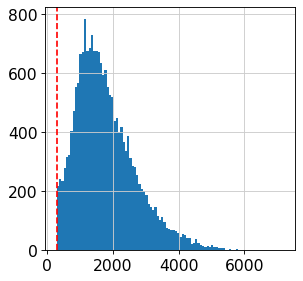

In [8]:
# Filter out cells with few genes 
import matplotlib.pyplot as plt
plt.hist(adata.obs['n_genes'], bins = 100)
plt.axvline(300, linestyle = '--', color = 'red')

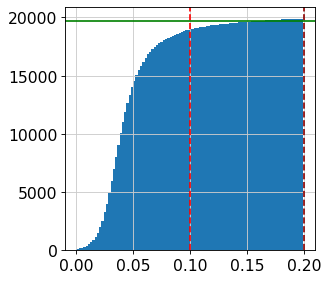

In [9]:
# Filter out cells with a high percentage of mitochondrial genes 
plt.hist(adata.obs['percent_mito'], bins = 100, cumulative=True)
plt.axvline(0.1, linestyle = '--', color = 'red')
plt.axvline(0.2, linestyle = '--', color = 'darkred')
plt.axhline(adata.n_obs*0.99, linestyle = '-', color = 'green')

In [10]:
sc.pl.violin(adata, ['n_genes', 'n_counts', 'percent_mito'],jitter=0.4, multi_panel=True, save='.pdf', show=False)
sc.pl.scatter(adata, x='n_counts', y='percent_mito', save='_numi_vs_mito.pdf', show=False)
sc.pl.scatter(adata, x='n_counts', y='n_genes', save='_numi_vs_ngenes.pdf', show=False)

... storing 'batch_collection' as categorical
... storing 'cryopreserved' as categorical
... storing 'individual' as categorical
... storing 'process' as categorical
... storing 'sample' as categorical
... storing 'stage' as categorical
... storing 'study' as categorical
... storing 'sample_source' as categorical
... storing 'doublet_score_0.75' as categorical
... storing 'leiden' as categorical
... storing 'enrichment' as categorical
... storing '5v1.1' as categorical
... storing 'TP' as categorical
... storing 'clusters' as categorical
... storing 'clusters_manual' as categorical
... storing 'phase' as categorical


In [11]:
print('Total number of cells: {:d}'.format(adata.n_obs))
print('Total number of genes: {:d}'.format(adata.n_vars))

Total number of cells: 19893
Total number of genes: 28497


#### Save raw data

In [12]:
adata.raw = adata.copy()

In [13]:
sc.pp.filter_genes(adata, min_cells=3)

filtered out 7613 genes that are detected in less than 3 cells


#### Normalize and log-transform

In [14]:
# Normalize per cell
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)

# Log-transform the data 
sc.pp.log1p(adata)

normalizing by total count per cell
    finished (0:00:01): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


#### Filter HVG and compute Principal Component Analysis with them 

In [15]:
bdata = adata.copy()
sc.pp.highly_variable_genes(bdata, min_mean=0.0125, max_mean=3, min_disp=0.5)
for col in ['highly_variable','means', 'dispersions', 'dispersions_norm']:
    adata.var[col] = bdata.var[col]
bdata = bdata[:, bdata.var['highly_variable']]
print('Total number of cells: {:d}'.format(bdata.n_obs))
print('Total number of genes: {:d}'.format(bdata.n_vars))

extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


Total number of cells: 19893
Total number of genes: 1994


In [16]:
sc.pp.scale(bdata, max_value=10)
sc.tl.pca(bdata, svd_solver='arpack', n_comps=50)

... as `zero_center=True`, sparse input is densified and may lead to large memory consumption
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:05)


#### Transfer PCA to the main adata

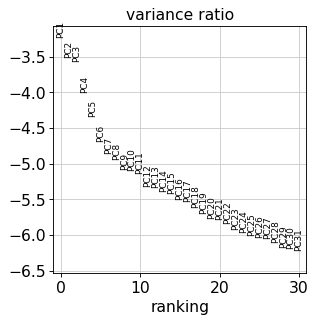

In [17]:
#fill NaNs with False so that subsetting to HVGs is possible
adata.var['highly_variable'].fillna(value=False, inplace=True)
adata.obsm['X_pca'] = bdata.obsm['X_pca'].copy()
adata.uns['pca'] = bdata.uns['pca'].copy()
adata.varm['PCs'] = np.zeros(shape=(adata.n_vars, 50))
adata.varm['PCs'][adata.var['highly_variable']] = bdata.varm['PCs']
sc.pl.pca_variance_ratio(adata, log=True, save='.pdf')

In [18]:
# Scale
sc.pp.scale(adata, max_value=10)

... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


#### Regress out cell cycle genes

In [19]:
# Regress out cell cycle genes
cell_cycle_genes = [x.strip() for x in open(file='/nfs/users/nfs_v/vl6/regev_lab_cell_cycle_genes.txt')]
s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]
s_genes = [x for x in s_genes if x in adata.var_names]
g2m_genes = [x for x in g2m_genes if x in adata.var_names]
sc.tl.score_genes_cell_cycle(adata, s_genes=s_genes, g2m_genes=g2m_genes, random_state = 123)
sc.pp.regress_out(adata, ['S_score', 'G2M_score'])

calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    545 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    544 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)
regressing out ['S_score', 'G2M_score']
... storing 'phase' as categorical
    finished (0:29:40)


#### Batch correction using Harmony

In [20]:
# Extract PCA matrix and batch array
n_pcs = 22
pca = adata.obsm['X_pca'][:, 0:(n_pcs)]
batch = adata.obs['individual']

In [21]:
# Batch-correct the PCA using HARMONY method
%load_ext rpy2.ipython

In [22]:
%%R -i pca -i batch -o hem

library(harmony)
library(magrittr)
set.seed(1000)
hem <- HarmonyMatrix(pca, batch, theta=0, do_pca=FALSE, verbose = FALSE)
hem = data.frame(hem)

R[write to console]: Loading required package: Rcpp



In [23]:
# Add harmony values to the anndata object
adata.obsm['X_pca'] = hem.values

In [24]:
sc.pp.neighbors(adata, n_pcs = n_pcs, random_state=1234)

computing neighbors
    using 'X_pca' with n_pcs = 22
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:25)


In [25]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:15)


#### Visualize metadata

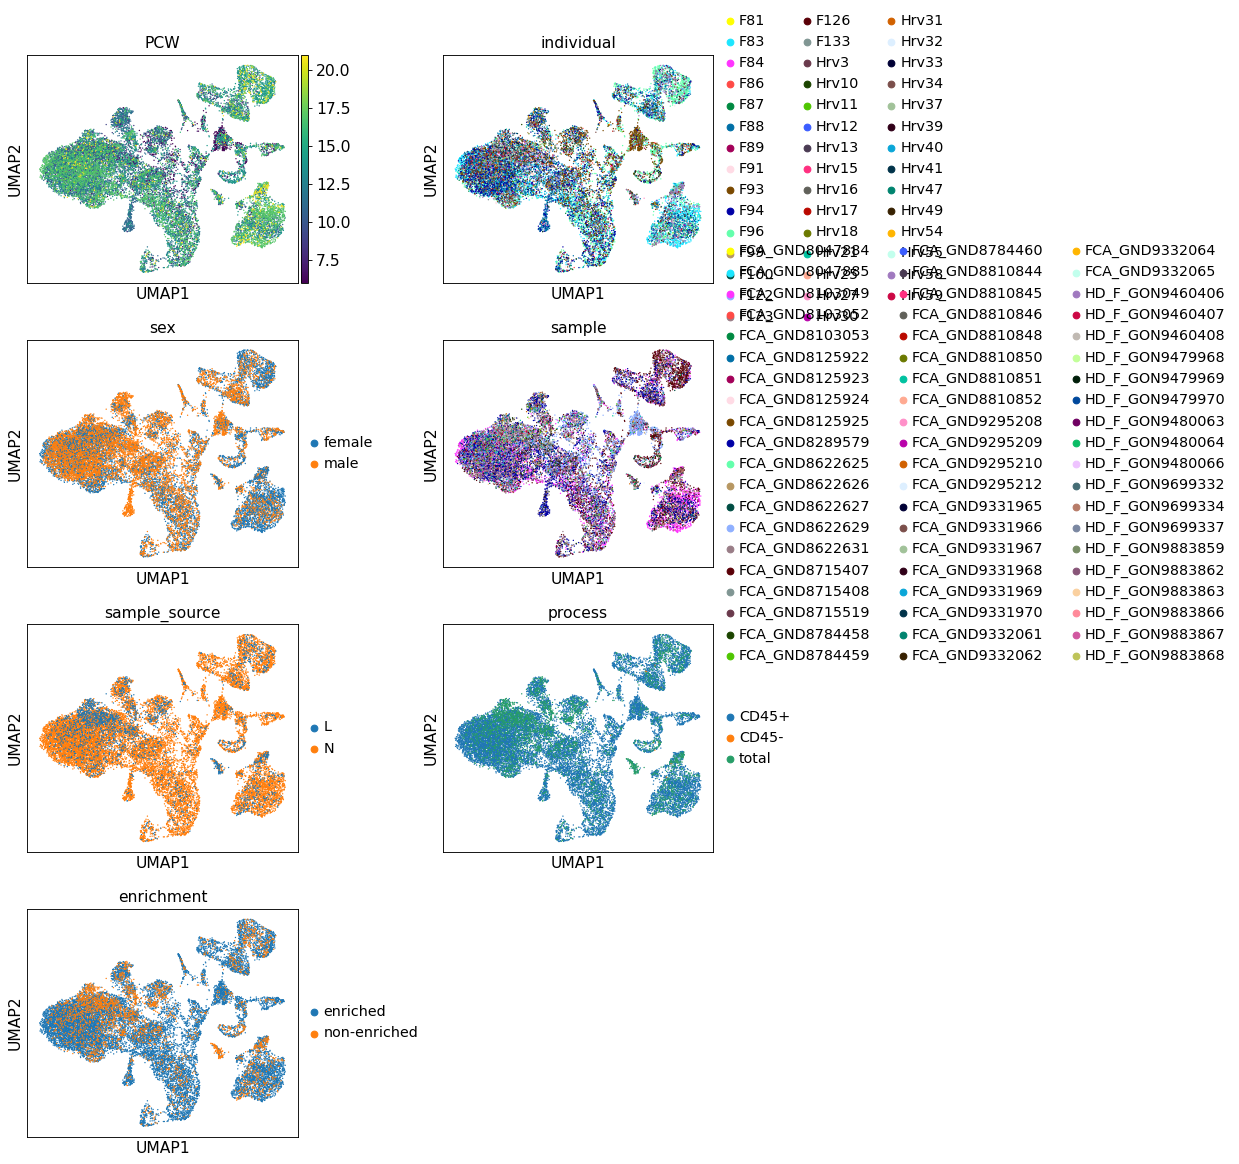

In [26]:
sc.pl.umap(adata, color=['PCW', 'individual', 'sex', 'sample', 'sample_source', 'process', 'enrichment'],
           save='.pdf', ncols = 2, wspace = 0.4)

#### Cluster the manifold 

running Leiden clustering
    finished: found 26 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:02)


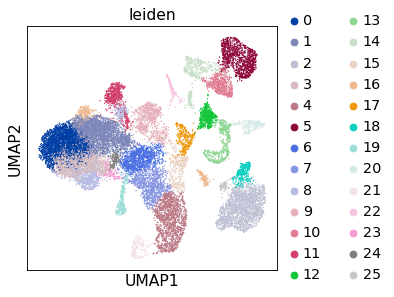

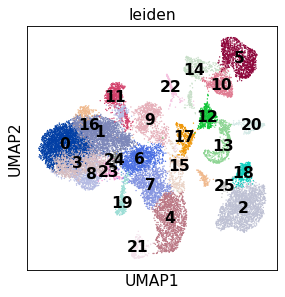

In [27]:
sc.tl.leiden(adata, resolution= 1)

sc.pl.umap(adata, color='leiden')
sc.pl.umap(adata, color='leiden',legend_loc='on data',save='_clustering_clusnumbers.pdf')

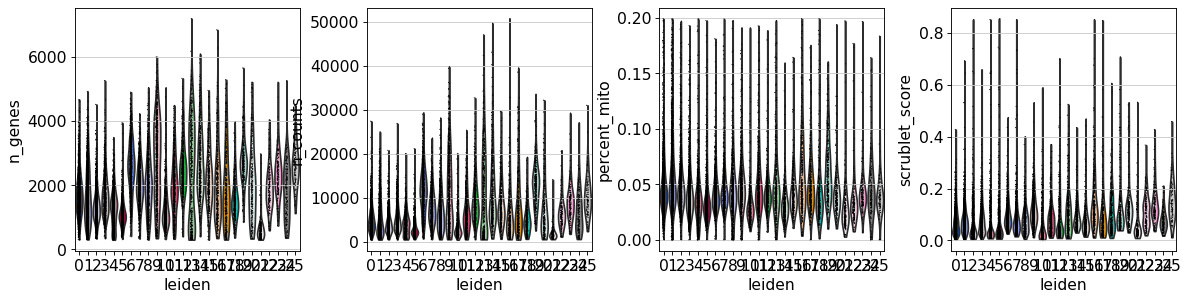

In [28]:
sc.pl.violin(adata, ['n_genes', 'n_counts', 'percent_mito', 'scrublet_score'], groupby = 'leiden')

#### Visualize expression of known markers

Known markers for B cells


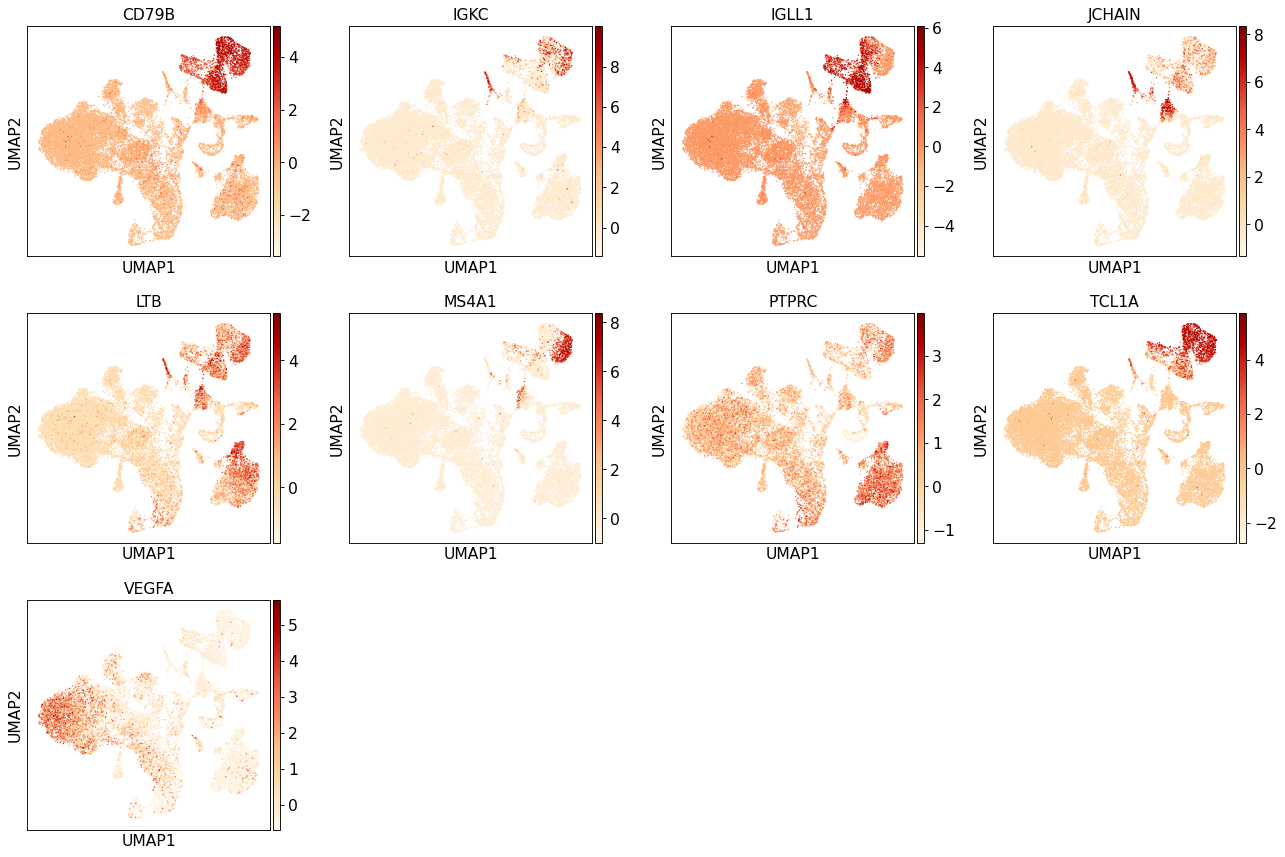

Known markers for Dendritic Cells


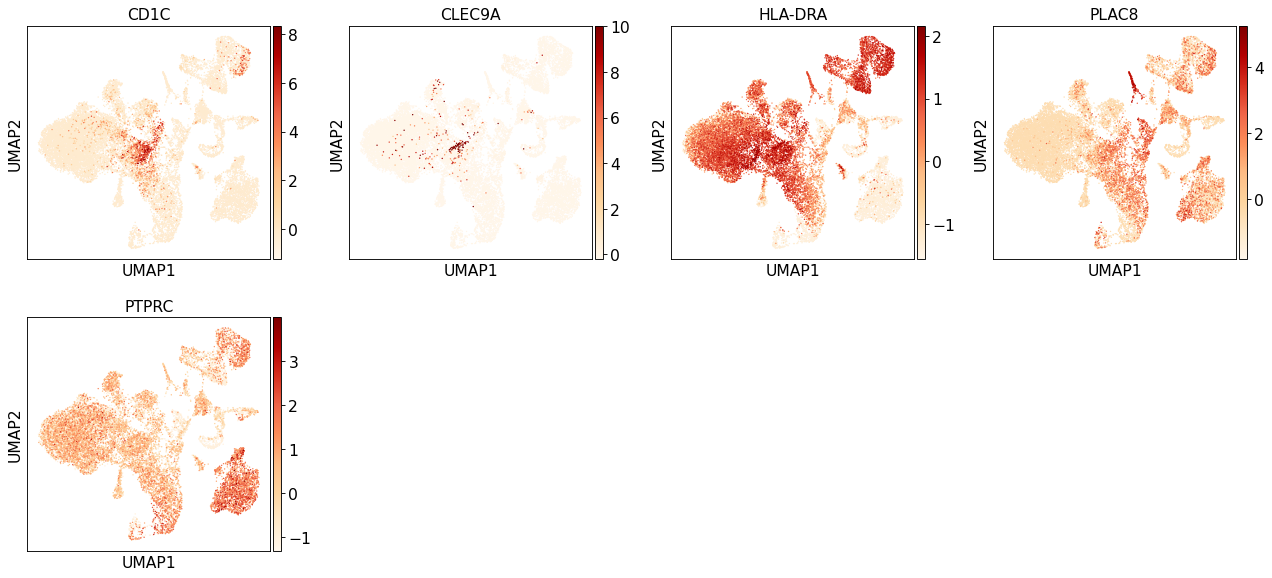

Known markers for Natural Killer cells


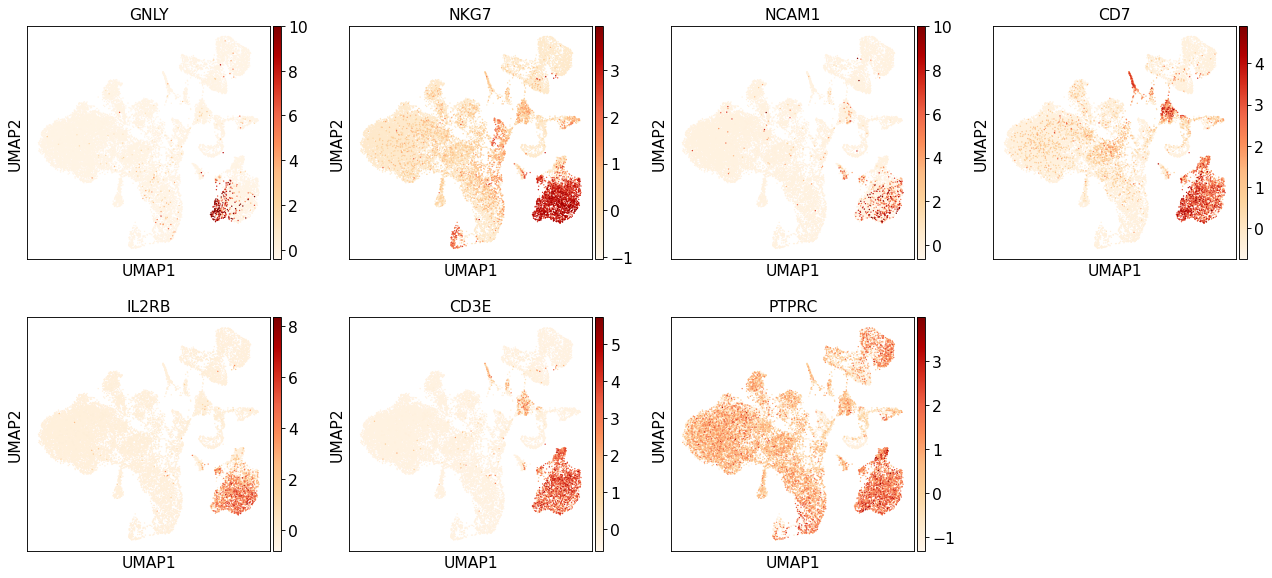

Known markers for ILC precursors


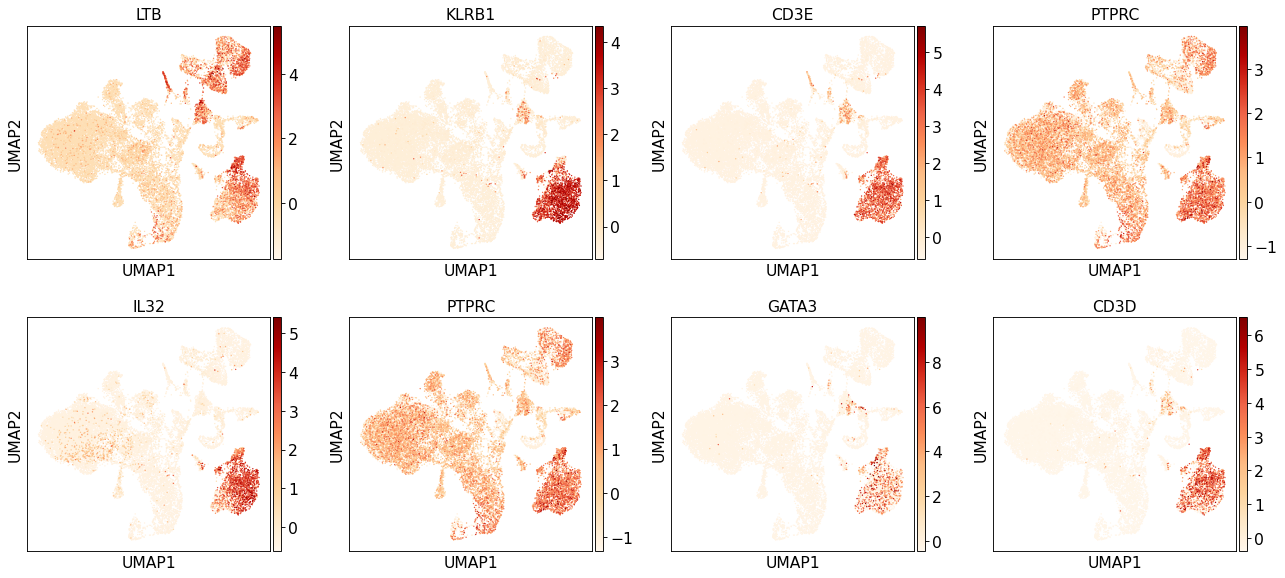

Known markers for Mast cells


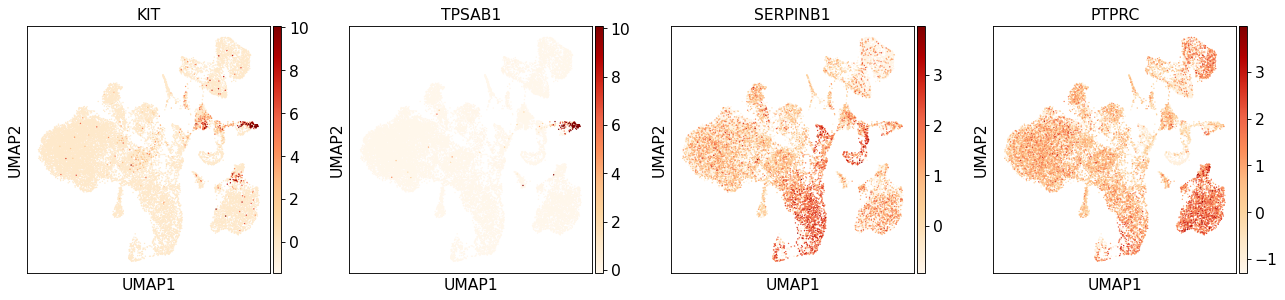

Known markers for Monocytes


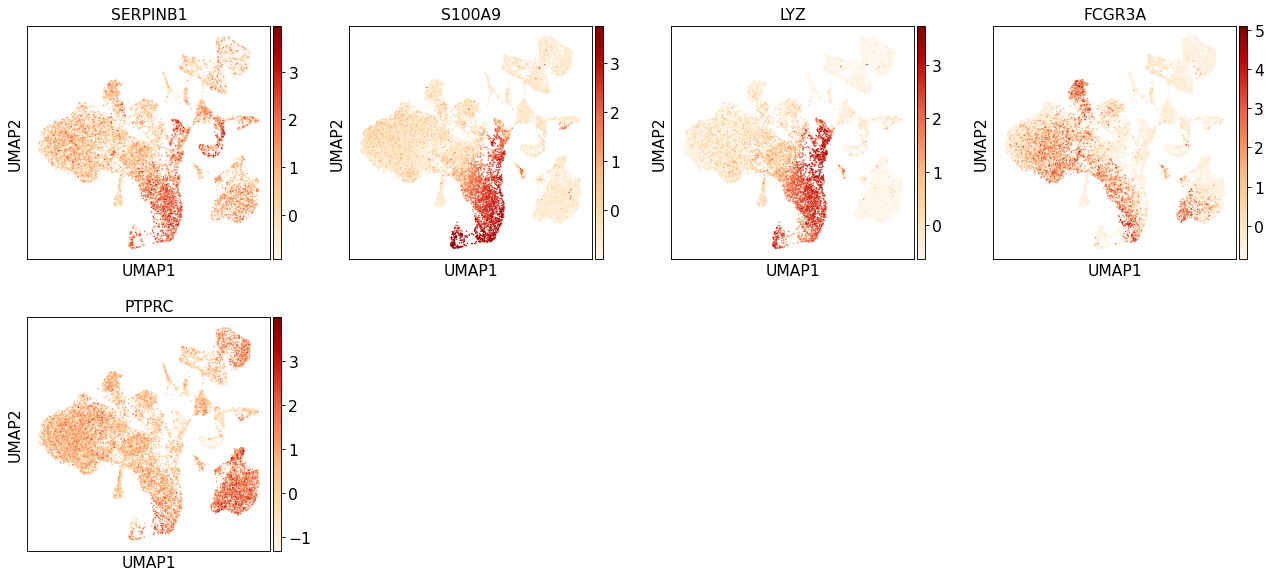

Known markers for Hematopoietic Stem Cells


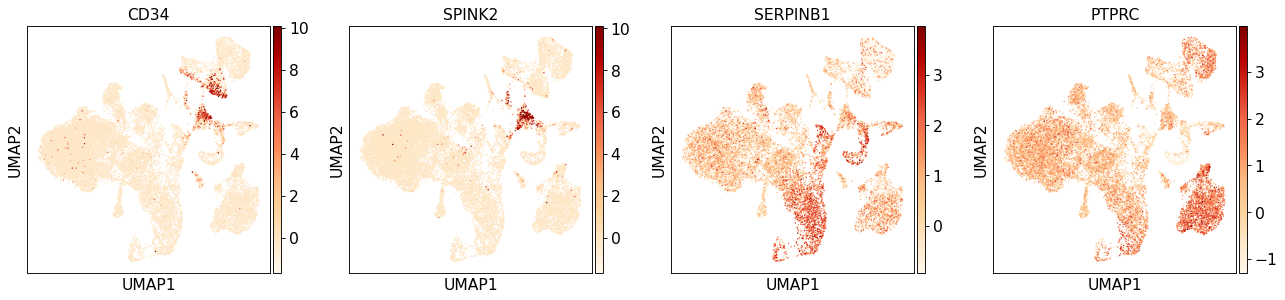

Known markers for Megakaryocytes


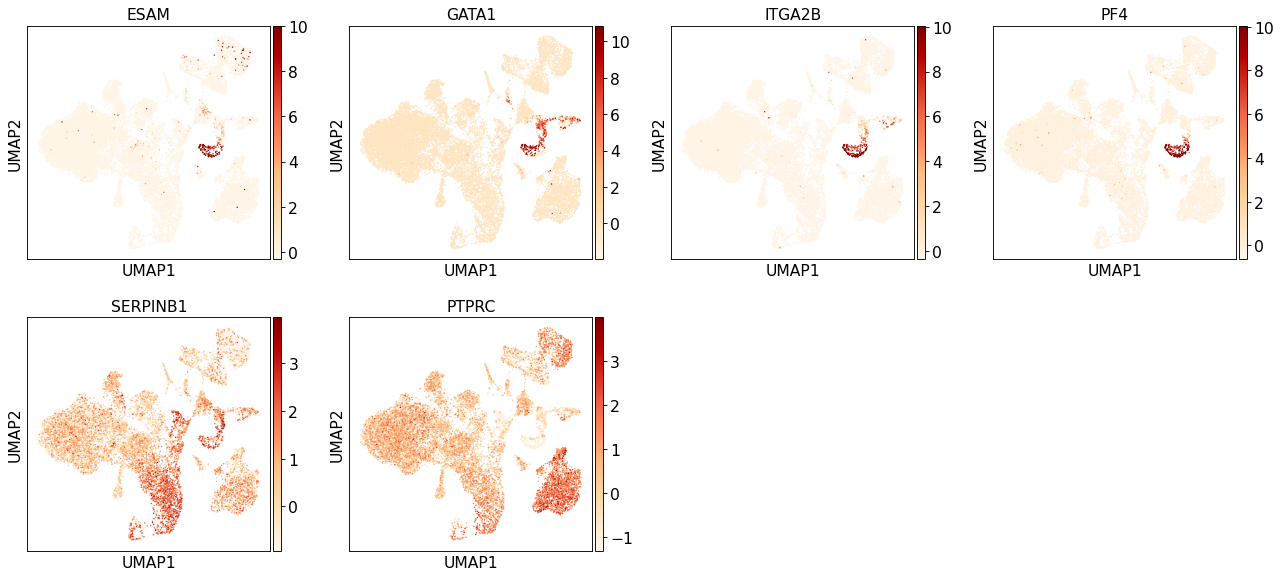

Known markers for Early Erythroid


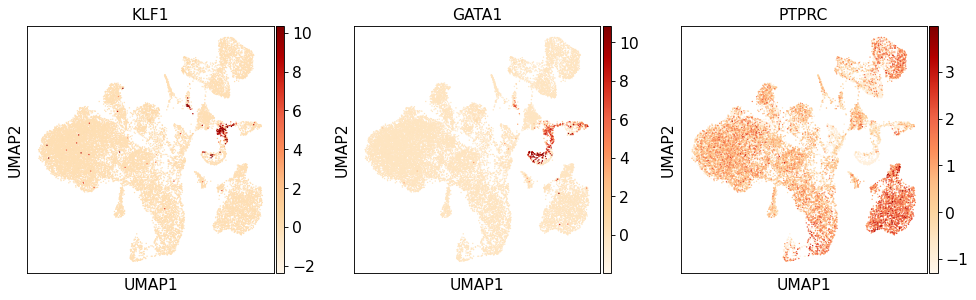

Known markers for Mid Erythroid


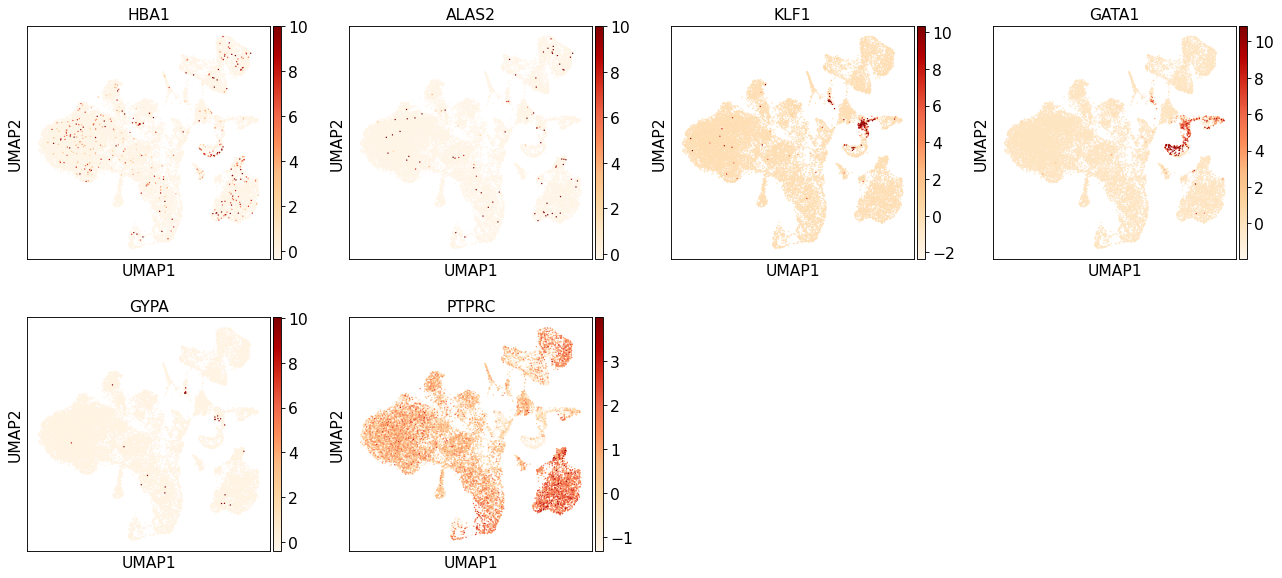

Known markers for Late Erythroid


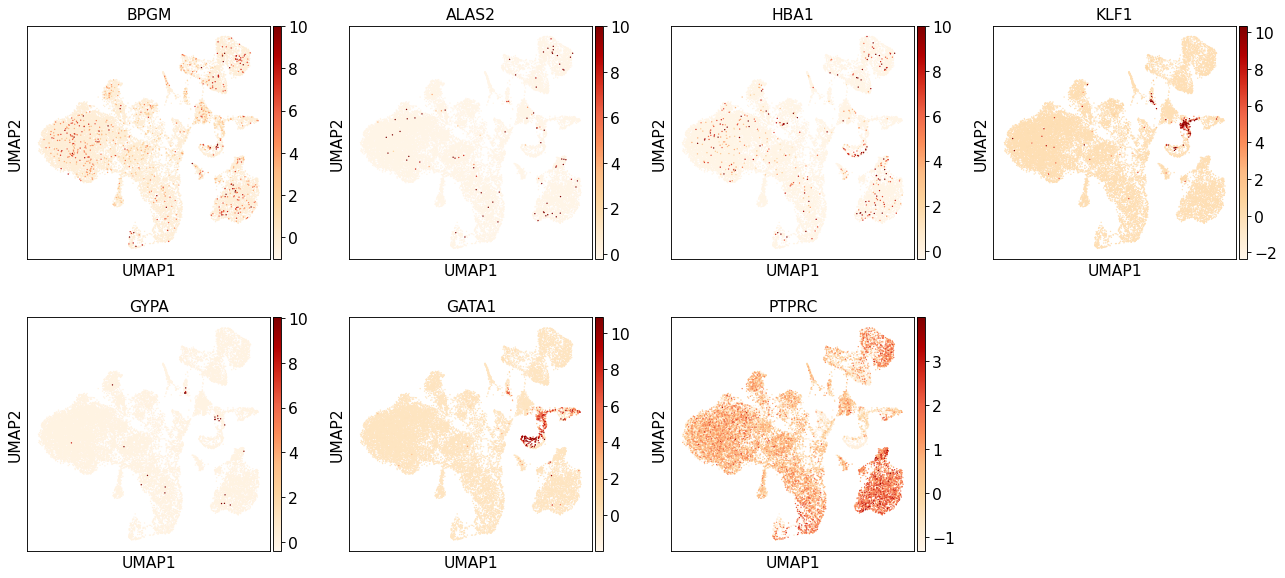

Known markers for Macrophages (broad sense)


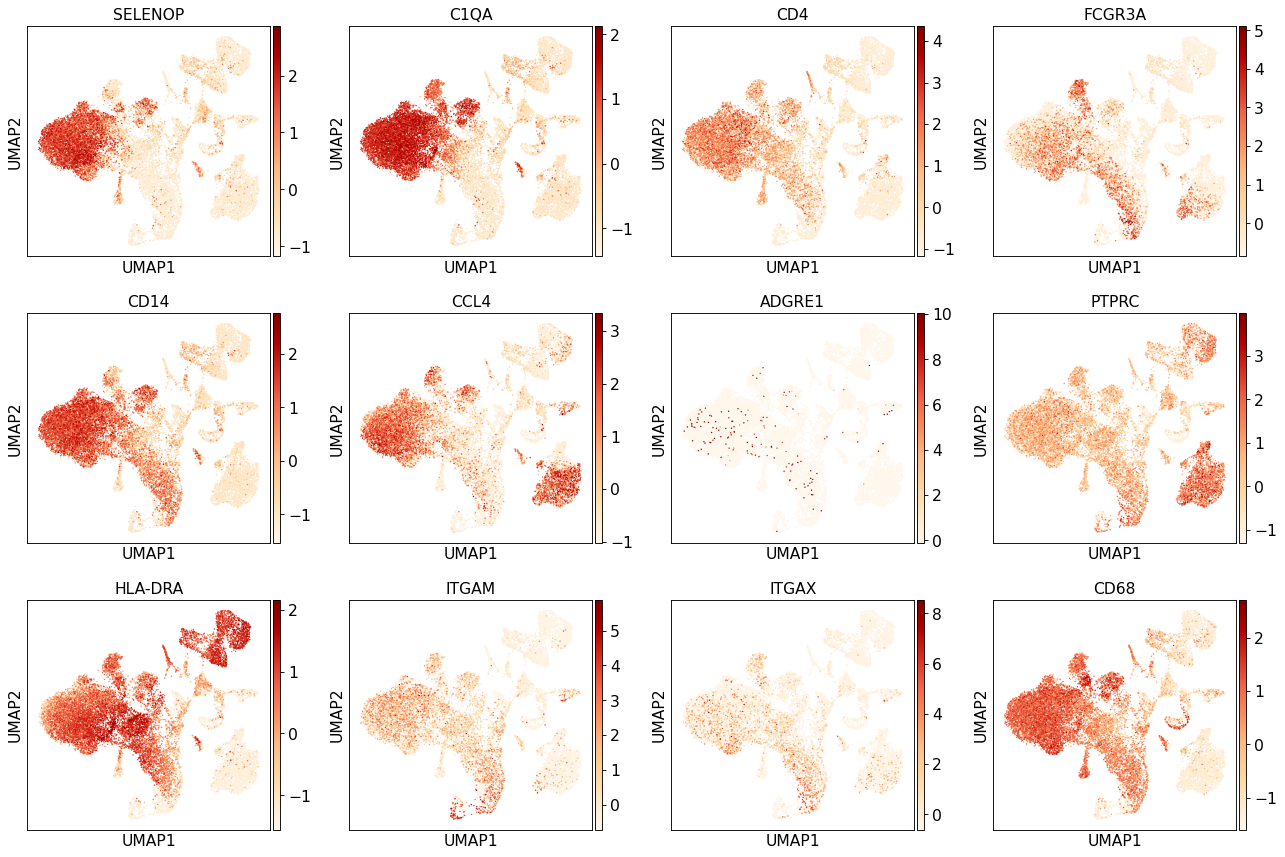

In [29]:
print('Known markers for B cells')
B_cells = np.unique(['VEGFA', 'CD79B', 'MS4A1', 'TCL1A', 'IGKC', 'JCHAIN', 'IGLL1', 'LTB', 'CD79B', 'IGLL1', 'CD79B', 
          'IGLL1', 'CD79B', 'TCL1A', 'IGKC', 'PTPRC'])
sc.pl.umap(adata, color= B_cells, color_map='OrRd', use_raw=False)

print('Known markers for Dendritic Cells')
DCs = np.unique(['CD1C', 'PLAC8', 'HLA-DRA', 'CLEC9A', 'PTPRC'])
sc.pl.umap(adata, color= DCs, color_map='OrRd', use_raw=False)

print('Known markers for Natural Killer cells')
NKs = ['GNLY', 'NKG7', 'NCAM1', 'CD7', 'IL2RB', 'CD3E', 'PTPRC']
sc.pl.umap(adata, color= NKs, color_map='OrRd', use_raw=False)

print('Known markers for ILC precursors')
ILCs = ['LTB', 'KLRB1', 'CD3E', 'PTPRC', 'IL32', 'PTPRC', 'GATA3', 'CD3D']
sc.pl.umap(adata, color= ILCs, color_map='OrRd', use_raw=False)

print('Known markers for Mast cells')
Mast = ['KIT', 'TPSAB1', 'SERPINB1', 'PTPRC']
sc.pl.umap(adata, color= Mast, color_map='OrRd', use_raw=False)

print('Known markers for Monocytes')
Monocytes = ['SERPINB1', 'S100A9', 'LYZ', 'FCGR3A', 'PTPRC']
sc.pl.umap(adata, color= Monocytes, color_map='OrRd', use_raw=False)

print('Known markers for Hematopoietic Stem Cells')
HSCs = ['CD34', 'SPINK2', 'SERPINB1', 'PTPRC']
sc.pl.umap(adata, color= HSCs, color_map='OrRd', use_raw=False)

print('Known markers for Megakaryocytes')
Megakaryocytes = ['ESAM', 'GATA1', 'ITGA2B', 'PF4', 'SERPINB1', 'PTPRC']
sc.pl.umap(adata, color= Megakaryocytes, color_map='OrRd', use_raw=False)

print('Known markers for Early Erythroid')
Early_erythroid = ['KLF1', 'GATA1', 'PTPRC']
sc.pl.umap(adata, color= Early_erythroid, color_map='OrRd', use_raw=False)

print('Known markers for Mid Erythroid') 
Mid_erythroid = ['HBA1', 'ALAS2', 'KLF1', 'GATA1', 'GYPA', 'PTPRC']
sc.pl.umap(adata, color= Mid_erythroid, color_map='OrRd', use_raw=False)

print('Known markers for Late Erythroid')
Late_erythroid = ['BPGM', 'ALAS2', 'HBA1', 'KLF1', 'GYPA', 'GATA1', 'PTPRC'] # less KLF1 and GATA1 
sc.pl.umap(adata, color= Late_erythroid, color_map='OrRd', use_raw=False)

print('Known markers for Macrophages (broad sense)')
Macrophages = ['SELENOP', 'C1QA', 'CD4', 'FCGR3A', 'CD14', 'CCL4', 'ADGRE1', 'PTPRC', 'HLA-DRA', 'ITGAM', 'ITGAX', 'CD68']
sc.pl.umap(adata, color= Macrophages, color_map='OrRd', use_raw=False)

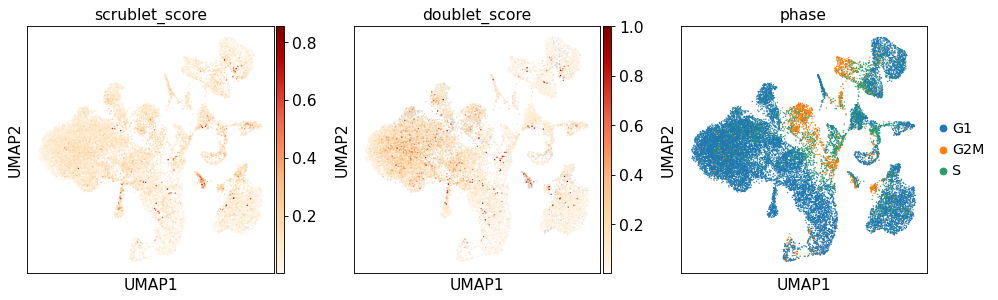

In [30]:
sc.pl.umap(adata, color = ['scrublet_score', 'doublet_score', 'phase'], color_map = 'OrRd')

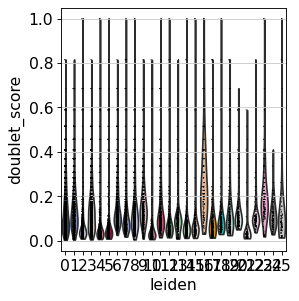

In [31]:
sc.pl.violin(adata, ['doublet_score'], groupby = 'leiden')

#### Remove cluster 16 of doublets

In [32]:
adata = adata[[i not in ['16'] for i in adata.obs['leiden']]]
adata.shape

(19538, 20884)

#### Visualize cluster compositions (sex and developmental stage)

In [33]:
def Barplot(which_var, adata, var='clusters', height=3, color = False):
    plotdata = pd.crosstab(adata.obs[var], adata.obs[which_var], normalize='index') * 100
    if 'category' in plotdata.index.dtype.name:
        plotdata.index.reorder_categories(adata.obs[var].cat.categories[::-1])

    if not color:
        ax1 = plotdata.plot.barh(stacked = True, edgecolor = 'none', zorder = 3, figsize = (6,height), fontsize = 14, grid = False)
    else:
        ax1 = plotdata.plot.barh(stacked = True, edgecolor = 'none', zorder = 3, figsize = (6,height), fontsize = 14, grid = False, color = color)
    ax1.set_title(which_var+' %')
    ax1.set_ylabel(var)
    horiz_offset = 1
    vert_offset = 1.
    ax1 = ax1.legend(bbox_to_anchor = (horiz_offset, vert_offset))
    ax1.figure.savefig(str(sc.settings.figdir)+'/barplot_'+var+'_proportions_'+which_var+'.pdf', bbox_inches='tight',
                       dpi=300, orientation='landscape', format= 'pdf', optimize=True)

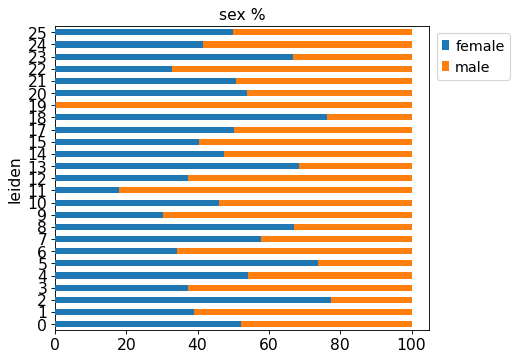

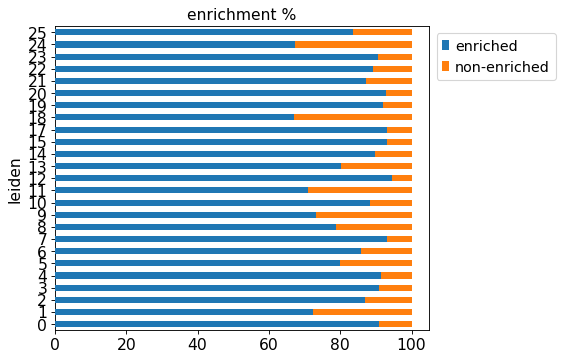

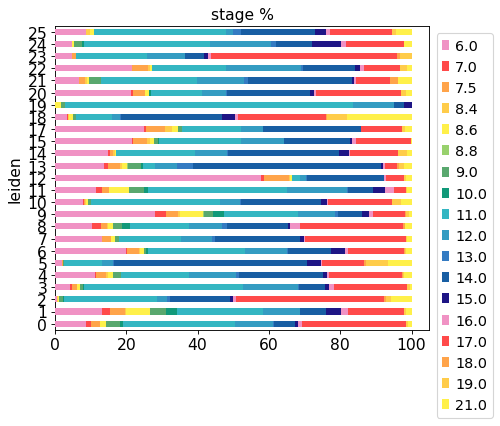

In [34]:
Barplot('sex', adata, var='leiden', height=5)
Barplot('enrichment', adata, var='leiden', height=5)
Barplot('stage', adata, var='leiden', height=5, color = ['#f092c4', '#ff4a4a', '#ffa44a', '#ffcc4a',
                                                          '#fff04a', '#98d16d', '#59a86e', '#119979',
                                                          '#34b6c2', '#349cc2', '#347bc2', '#185ea3', 
                                                          '#1e1585'])

#### Save for label transfer from fetal liver 

In [43]:
adata.write('/nfs/team292/vl6/immune_fetal_gonads/immune_merged_preprocessing.h5ad')

#### End of notebook 